In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory to path
sys.path.append(os.path.abspath('..'))

from src.preprocess import load_and_window_data, split_data, apply_bandpass_filter, plot_psd_comparison

In [2]:
# data load
data_path = '../data/BCICIV_calib_ds1a.mat'
fs = 100 # Adjust if the dataset documentation specifies a different sampling rate

# Load and window data
X, y = load_and_window_data(data_path, fs=fs)

print(f"Dataset shape after windowing: {X.shape}")
print(f"Labels shape: {y.shape}")

Dataset shape after windowing: (100, 59, 300)
Labels shape: (100,)


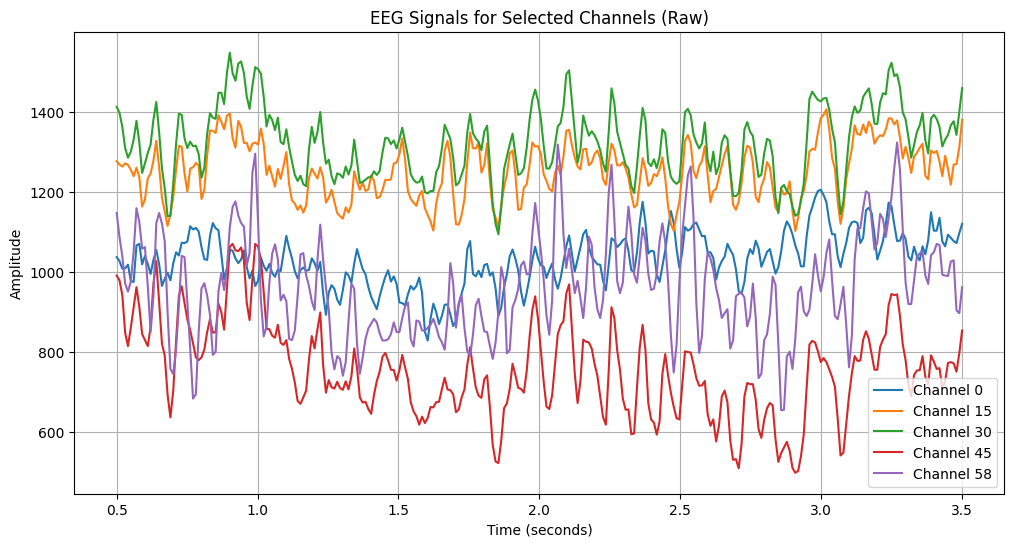

In [3]:
sample_idx = 0 
channels_to_plot = [0, 15, 30, 45, 58] # 0-indexed
time_axis = np.linspace(0.5, 3.5, X.shape[2])

plt.figure(figsize=(12, 6))
for ch in channels_to_plot:
    plt.plot(time_axis, X[sample_idx, ch, :], label=f'Channel {ch}')

plt.title('EEG Signals for Selected Channels (Raw)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

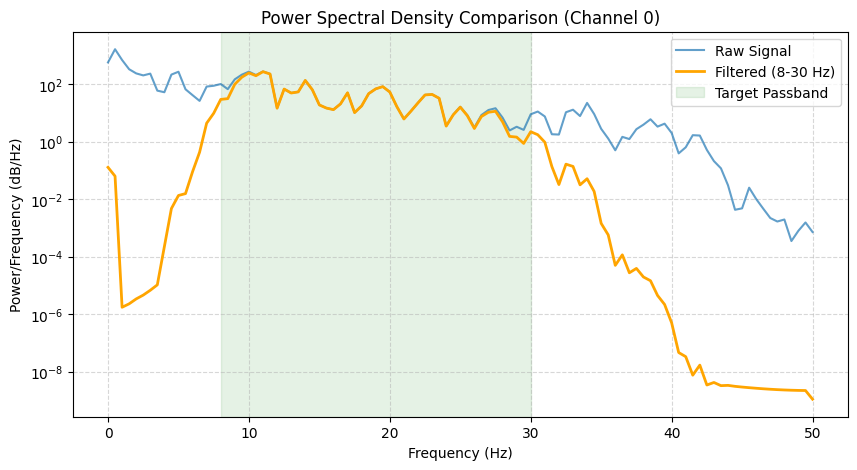

In [4]:
X_filtered = apply_bandpass_filter(X, fs=fs)

plot_psd_comparison(X, X_filtered, fs=fs, channel_idx=0)

In [5]:
X_train, X_test, y_train, y_test = split_data(X_filtered, y)